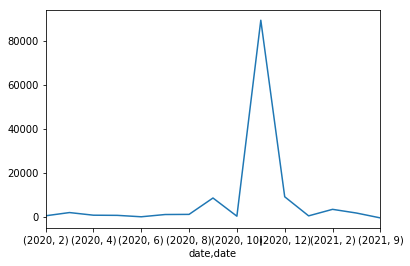

In [14]:
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import glob
import os
import matplotlib.pyplot as plt
from textblob import TextBlob
country="consolidated_data"
filepath="C:\\Users\\NEW\\"+country
DATASET_ENCODING = "ISO-8859-1"
csv_files = glob.glob(os.path.join(filepath, "*.csv"))
final_result = pd.DataFrame()
for f in csv_files:
    vaccine_data=pd.read_csv(f,error_bad_lines=False,encoding=DATASET_ENCODING)
    vaccine_data=vaccine_data[['date','time','place','tweet','hashtags','replies_count','retweets_count','likes_count']]
    text_cleaaning_regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    def preprocess(text):
        text = re.sub(text_cleaaning_regex,' ', str(text))
        return "".join(text)
    vaccine_data.tweet = vaccine_data.tweet.apply(lambda x: preprocess(x))
    #vaccine_data.place=country
    for index, row in vaccine_data['tweet'].iteritems():
        score = SentimentIntensityAnalyzer().polarity_scores(row)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        if neg > pos:
             vaccine_data.loc[index, 'Sentiment'] = "negative"
        elif pos > neg:
             vaccine_data.loc[index, 'Sentiment'] = "positive"
        else:
             vaccine_data.loc[index, 'Sentiment'] = "neutral"
        vaccine_data.loc[index, 'Negative'] = neg
        vaccine_data.loc[index, 'Neutral'] = neu
        vaccine_data.loc[index, 'Positive'] = pos
    final_result = final_result.append(vaccine_data)
final_result.to_csv("C:\\Users\\NEW\\consolidated_data\\Data_"+country+".csv",index=False)
df1=pd.read_csv("C:\\Users\\NEW\\consolidated_data\\Data_"+country+".csv")
for index,row in df1['Sentiment'].iteritems():
    if df1.loc[index,'Sentiment'] == "positive":
        df1.loc[index,'weights'] = 1*df1.loc[index,'likes_count']+1
    elif df1.loc[index,'Sentiment'] == "negative":
        df1.loc[index,'weights'] = -1*df1.loc[index,'likes_count']-1
    else:
        df1.loc[index,'weights'] = 0*df1.loc[index,'likes_count']
df1.to_csv("C:\\Users\\NEW\\consolidated_data\\Data_"+country+".csv",index=False)
df1['date']=pd.to_datetime(df1['date'])
result=df1.groupby([df1['date'].dt.year,df1['date'].dt.month]).sum()['weights']
result.plot.line()  